In [76]:
from singularite import eclatements, pairwise_coprime, isJStrict


def ok(n, xs):
    if all(x <= 1 for x in xs):
        return True
    return pairwise_coprime((n, *xs))

def to_tex(n, xs):
    return f'{{[{xs}]}}_{{{n}}}'

def to_s(n, xs):
    return f'{xs}_{n}'

def T(n, xs):
    children, bad = [], set()
    if ok(n, xs):
        for (ni, xi) in eclatements(n, xs):
            subt, subs = T(ni, xi)
            children.append(subt)
            bad |= subs
    else:
        bad |= {(n, xs)}
    return (LabelledOrderedTree(children, label=(n, xs)), bad)

In [150]:
def vis_eval(n, r):
    uncurry = lambda f: lambda p: f(*p)
    t, b = T(n, r)
    assert isJStrict(n, r) == (len(b) == 0)
    if len(b) == 0:
        view(t.map_labels(uncurry(to_tex)))
    else:
        show(t.as_digraph().plot(vertex_color='green', vertex_colors={'red': b, 'cyan': [(n, r)]}, layout='acyclic', vertex_labels=uncurry(to_s)))


# n, r =  23, (8, 5, 3)
# vis_eval(98, (3, 5, 83))

In [ ]:
from singularite import pairwise_coprime, group, isJStrict
from itertools import combinations

def pred(n, a, b, c):
    if a <= 1 or b <= 1 or c <= 1:
        return False
    if not pairwise_coprime([n, a, b, c]):
        return False
    if not all(isJStrict(n, (i, j)) for (i, j) in combinations([a, b, c], 2)):
        return False
    return True

# 41, (2, 3, 7)
for n in range(100, 200):
    for (a, b, c) in combinations(group(n), 3):
        # if pred(n, a, b, c) and isJStrict(n, (a, b, c)):
        if pred(n, a, b, c):
            print(n, a, b, c)
            vis_eval(n, (a, b, c))


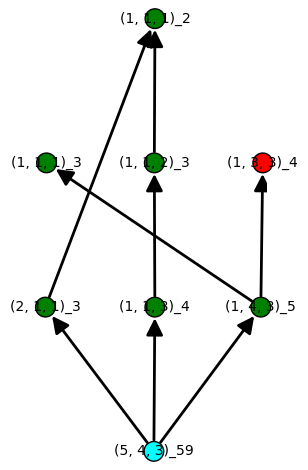

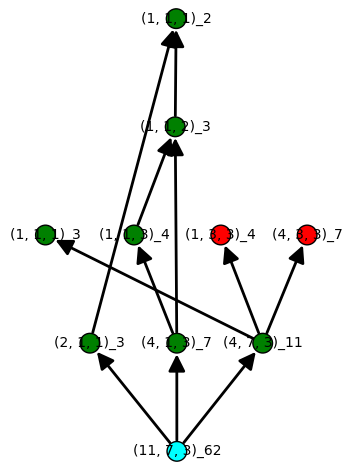

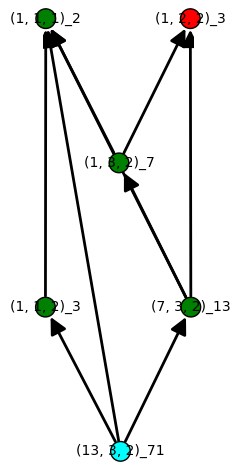

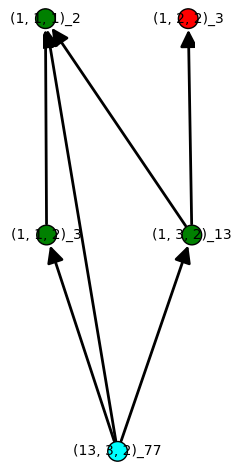

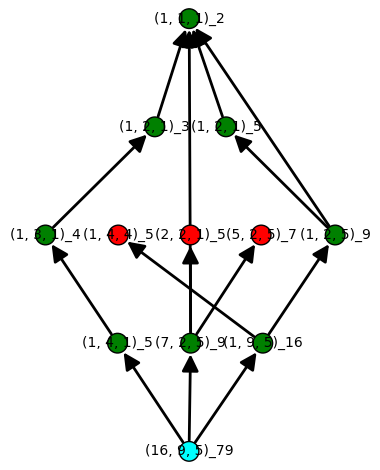

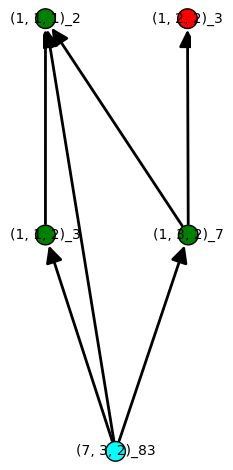

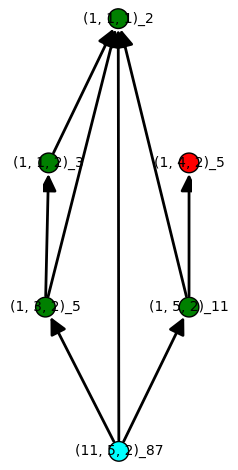

In [143]:
l = [
    (59, (5, 4, 3)),
    (62, (11, 7, 3)),
    (71, (13, 3, 2)),
    (77, (13, 3, 2)),
    (79, (16, 9, 5)),
    (83, (7, 3, 2)),
    (87, (11, 5, 2))
]

for (n, xs) in l:
    vis_eval(n, xs)